Sample with (width, height): (25.0, 32.0) classified as pikachu
Sample with (width, height): (24.2, 31.5) classified as pikachu
Sample with (width, height): (22.0, 34.0) classified as pikachu
Sample with (width, height): (20.5, 34.0) classified as pichu


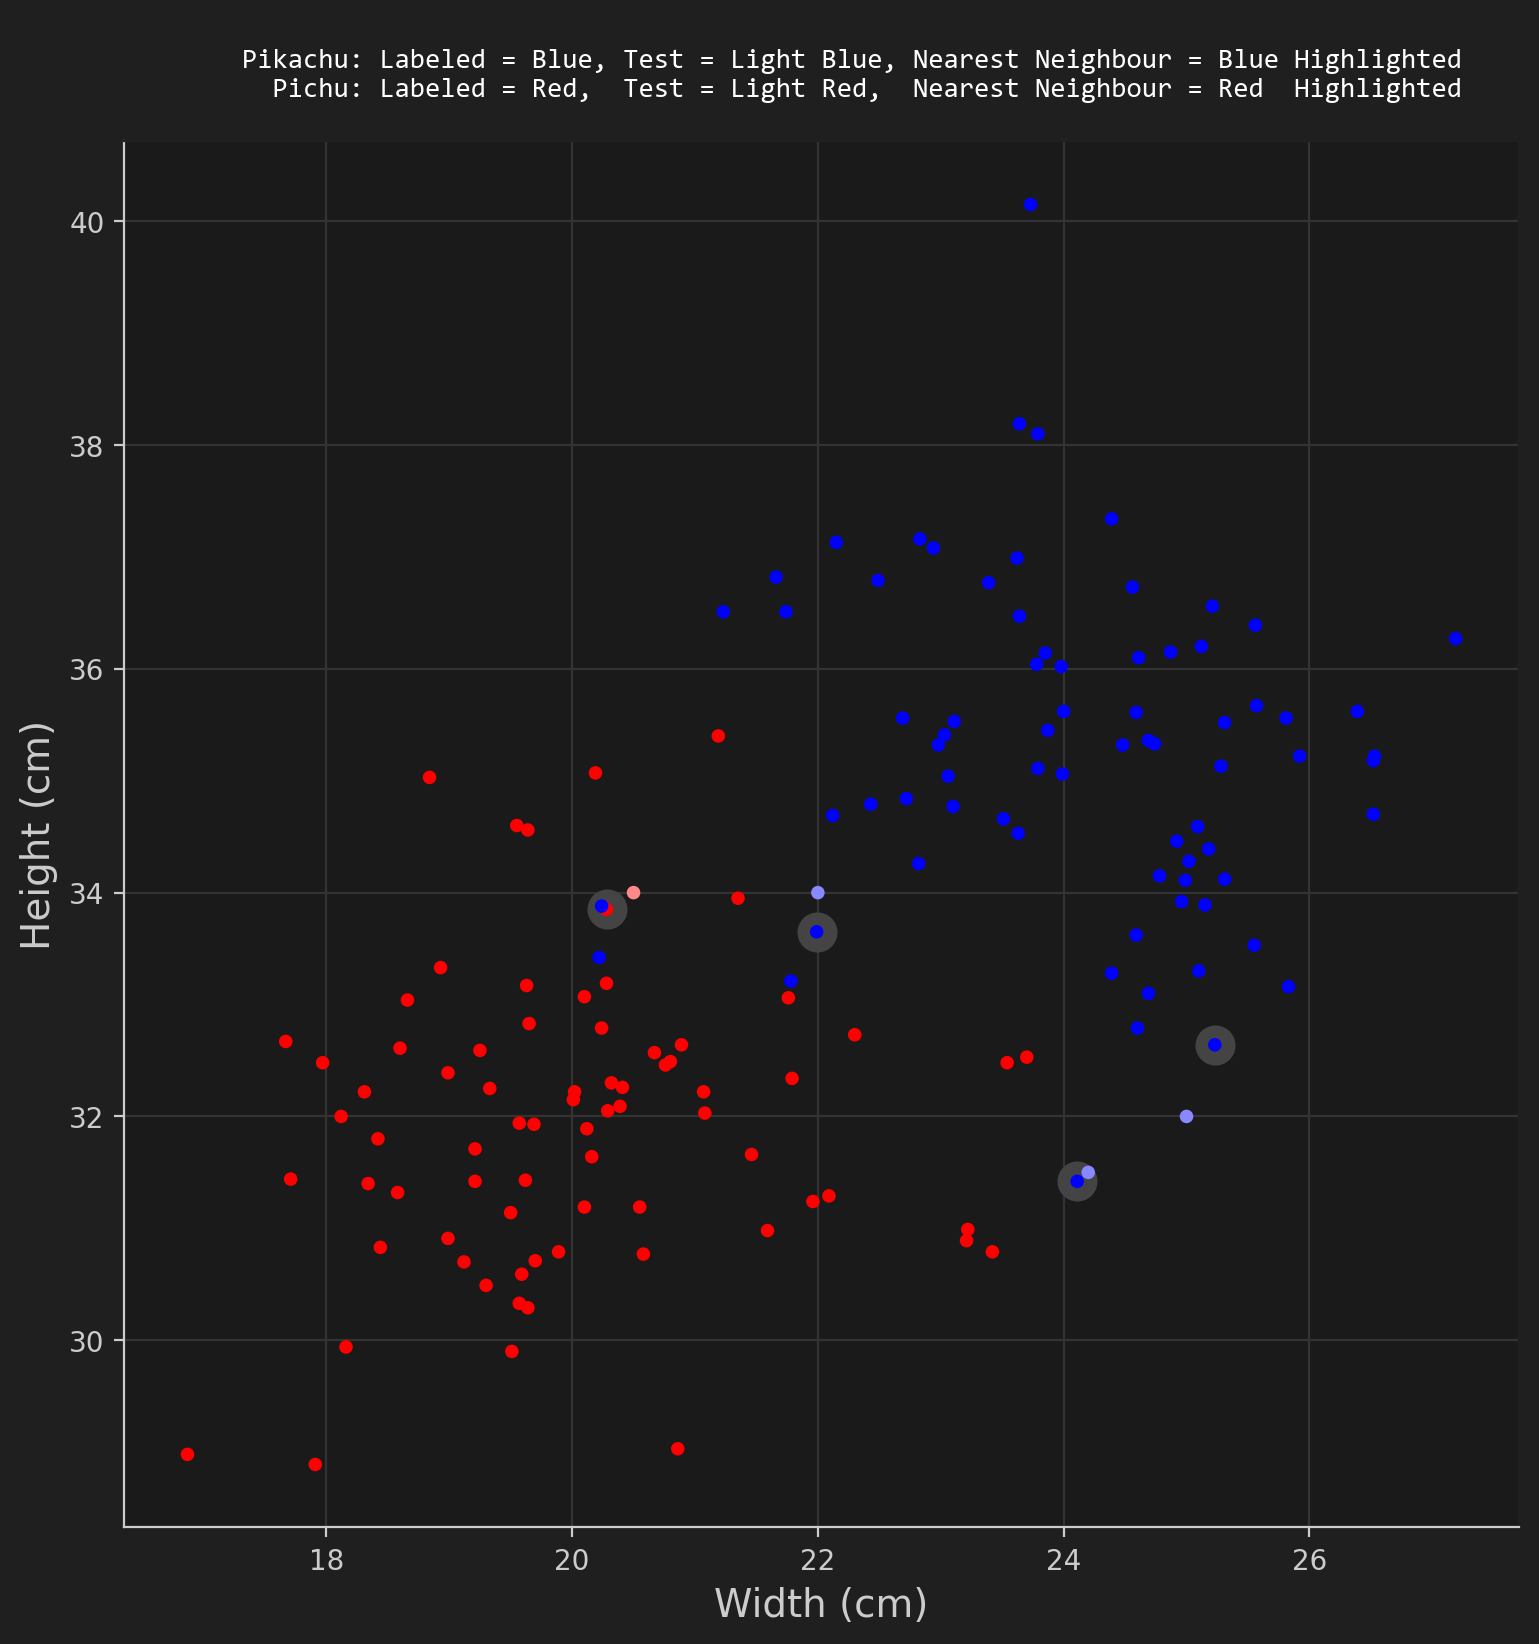

In [282]:
# Grunduppgift : Läs in Data, Räkna ut Närmsta Granne, Klassificera Testpunkter, Rita ut en Scatter Plott

import matplotlib.pyplot as plt
import numpy as np
import re
 

# next  : Skips the first line in the text file
# Regex : I use regex to seperate the string data. This way I can use the same function for
#         both the datapoints and the testpoints by simply swiching out the path and expression.
#         But I think this approch ended up being more complicated and lesse efficient than
#         simply making two seperate functions.
# guess : When I check for closest neighbour(s) I add the classification to guess rather then to 
#         the label, keeping them seperated like this will make the 'Accuracy' task a 
#         little easier. 
# color : I give the data points a color value directly, all though color value of the testpoints
#         is changed once it's been classified 
def read_data(path, expression):
    points = list()
    with open(path, "r") as file:
        next(file)
        for line in file.readlines():
            group = re.findall(expression, line)[0]
            points.append( { 
                "width": round(float(group[0]), 2),
                "height": round(float(group[1]), 2),
                "label": None if len(group) < 3 else int(group[2]),
                "guess": None,
                "color": "#ffffff" if len(group) < 3 else "#0000ff" if int(group[2]) else "#ff0000",
                } )
    return points




def euclidean_sort(labeld_point, test_point, ):
    tpw = test_point["width"]
    tph = test_point["height"]
    lpw = labeld_point["width"]
    lph = labeld_point["height"]
    return np.sqrt( (tpw - lpw)**2 + (tph - lph)**2 ) 

# This function can sort both by closest neighbour and by closest group
# by simply setting the 'number_of_neighbours' parameters to 1 or 10 respectively
def closest_neighbour(number_of_neighbours, test_points, labeld_points):
    all_closest_points = []
    
    # Sorts the point list based on euclidean distance and saves the 1 or 10 slize in a new list
    # the second list all_closest_points is used in the scatter plot to highlight the closest neighbours
    for key, test_point in enumerate(test_points):       
        closest_points = sorted(labeld_points, key=lambda labeled_point: euclidean_sort(labeled_point, test_point) )[:number_of_neighbours]
        all_closest_points.extend(closest_points)
        
        # Counts the number of points that are pikachu / pichu in the list
        pikachu = pichu = 0
        [ (pikachu:=pikachu+1) if point["label"] == 1 else (pichu:=pichu+1) for point in closest_points ]
        
        # Sets the label to pikachu / pichu based on majority, if equal then it picks based on the first closest point
        if pikachu > pichu:
            test_points[key]["guess"] = 1
        elif pichu < pikachu:
            test_points[key]["guess"] = 0
        else:
            test_points[key]["guess"] = closest_points[0]["label"]
    
    return test_points, all_closest_points


# Used to set the color of the test points once they have been classified
# I use a lighter red and a lighter blue so you can see which once are 
# test colors on the scatter plot
def set_color( points ):
    for e in range(len(points)):
        points[e]["color"] = "#ff8888" if points[e]["guess"] == 0 else "#8888ff"
    return points

# Returns a string that contains the cordinates and new lable of the points that has been tested
def get_classification( points ):
    return "\n".join([ f"Sample with (width, height): {(obj["width"], obj["height"])} classified as {get_label(obj["guess"])}" for obj in points])
    

def get_label(label_number):
    return "pikachu" if label_number else "pichu" 


def plot(points, closest_points):
    fig = plt.figure(dpi=200, figsize=(9,9))
    ax = fig.add_subplot(1,1,1)

    ax.set_facecolor((0.1, 0.1, 0.1))
    ax.tick_params(axis='x', colors=(0.8, 0.8, 0.8))
    ax.tick_params(axis='y', colors=(0.8, 0.8, 0.8))
    ax.yaxis.label.set_color((0.8, 0.8, 0.8))
    ax.xaxis.label.set_color((0.8, 0.8, 0.8))
    ax.spines['bottom'].set_color((0.8, 0.8, 0.8))
    ax.spines['left'].set_color((0.8, 0.8, 0.8))
    ax.spines['top'].set_color((0.12, 0.12, 0.12))
    ax.spines['right'].set_color((0.12, 0.12, 0.12))
    fig.set_facecolor((0.12, 0.12, 0.12))

    plt.title(
    """   
    Pikachu: Labeled = Blue, Test = Light Blue, Nearest Neighbour = Blue Highlighted
      Pichu: Labeled = Red,  Test = Light Red,  Nearest Neighbour = Red  Highlighted
              """, fontdict={"color":"white", "family":"consolas", "size":10})
    plt.grid(visible=None, which='major', axis='both', color=(0.2, 0.2, 0.2))
    
    # I chose to add the color to each individual point rather then adding them in two seperate scatter 
    # plots, its probably less efficient but it allows you to have a unique color for each point.
    plt.scatter([e["width"] for e in points], [e["height"] for e in points], color=[e["color"] for e in points], marker=".", s=60, zorder=3)
    
    # This second scatter plot adds gray circles under the closest points in order to highlight them 
    plt.scatter([e["width"] for e in closest_points], [e["height"] for e in closest_points], color="#444444", marker="o", s=180, zorder=2)
    plt.ylabel("Height (cm)", fontsize=14, color=(0.8, 0.8, 0.8))
    plt.xlabel("Width (cm)", fontsize=14, color=(0.8, 0.8, 0.8))
    plt.show()
    plt.close()



def main():
    labled_points = read_data("datapoints.txt", r"(\d.*?), (\d.*?), (\d)")
    test_points = read_data("testpoints.txt", r"\((\d.*?), (\d.*)\)")

    test_points, closest_points = closest_neighbour(1,test_points, labled_points)
    test_points = set_color(test_points)

    print(get_classification(test_points))
    plot(labled_points+test_points, closest_points)


main()

Closest Neighbour
Sample with (width, height): (21.0, 35.5) classified as pichu


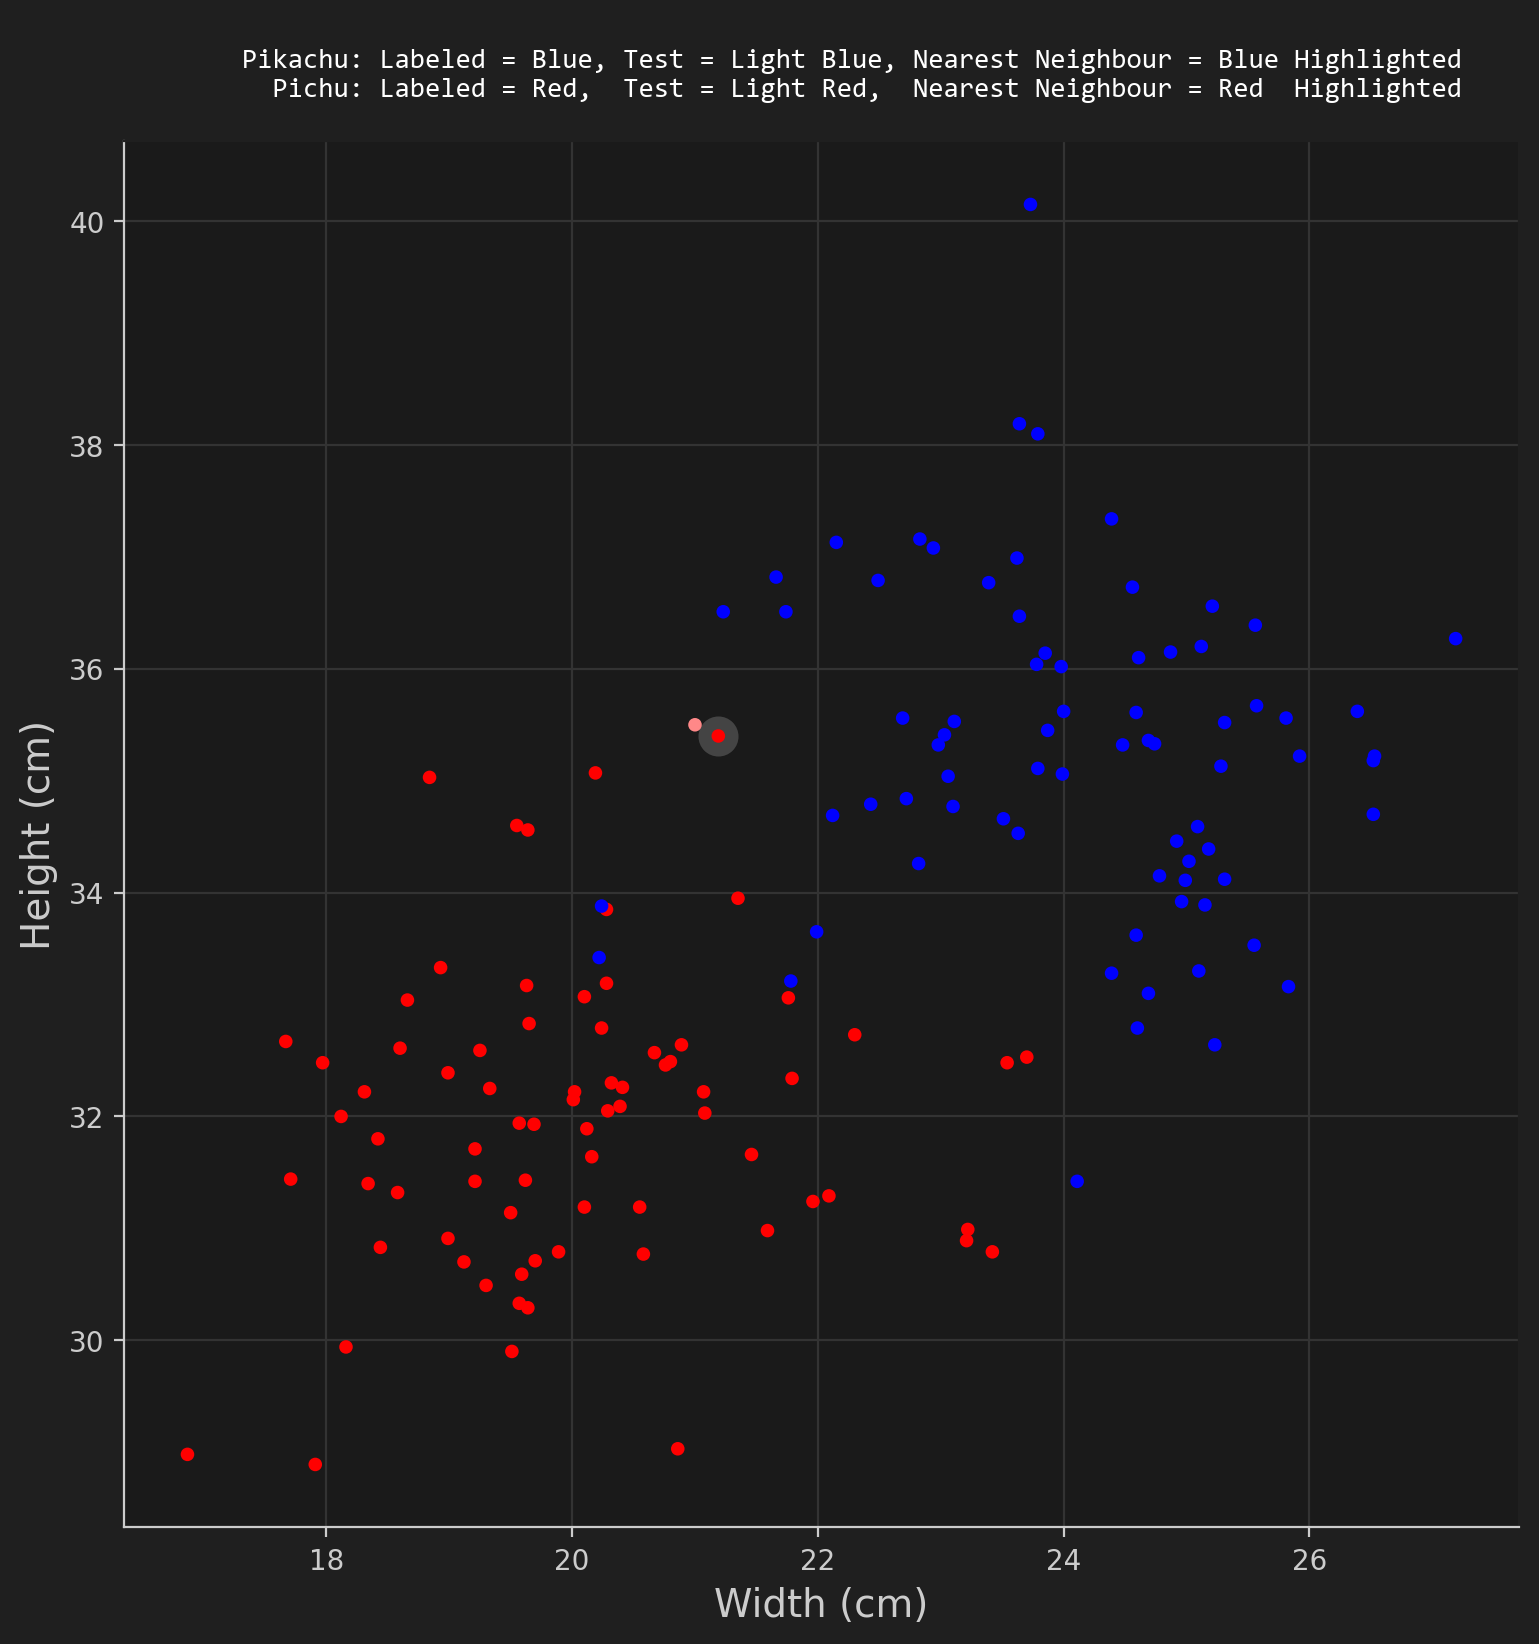

Closest Group
Sample with (width, height): (21.0, 35.5) classified as pikachu


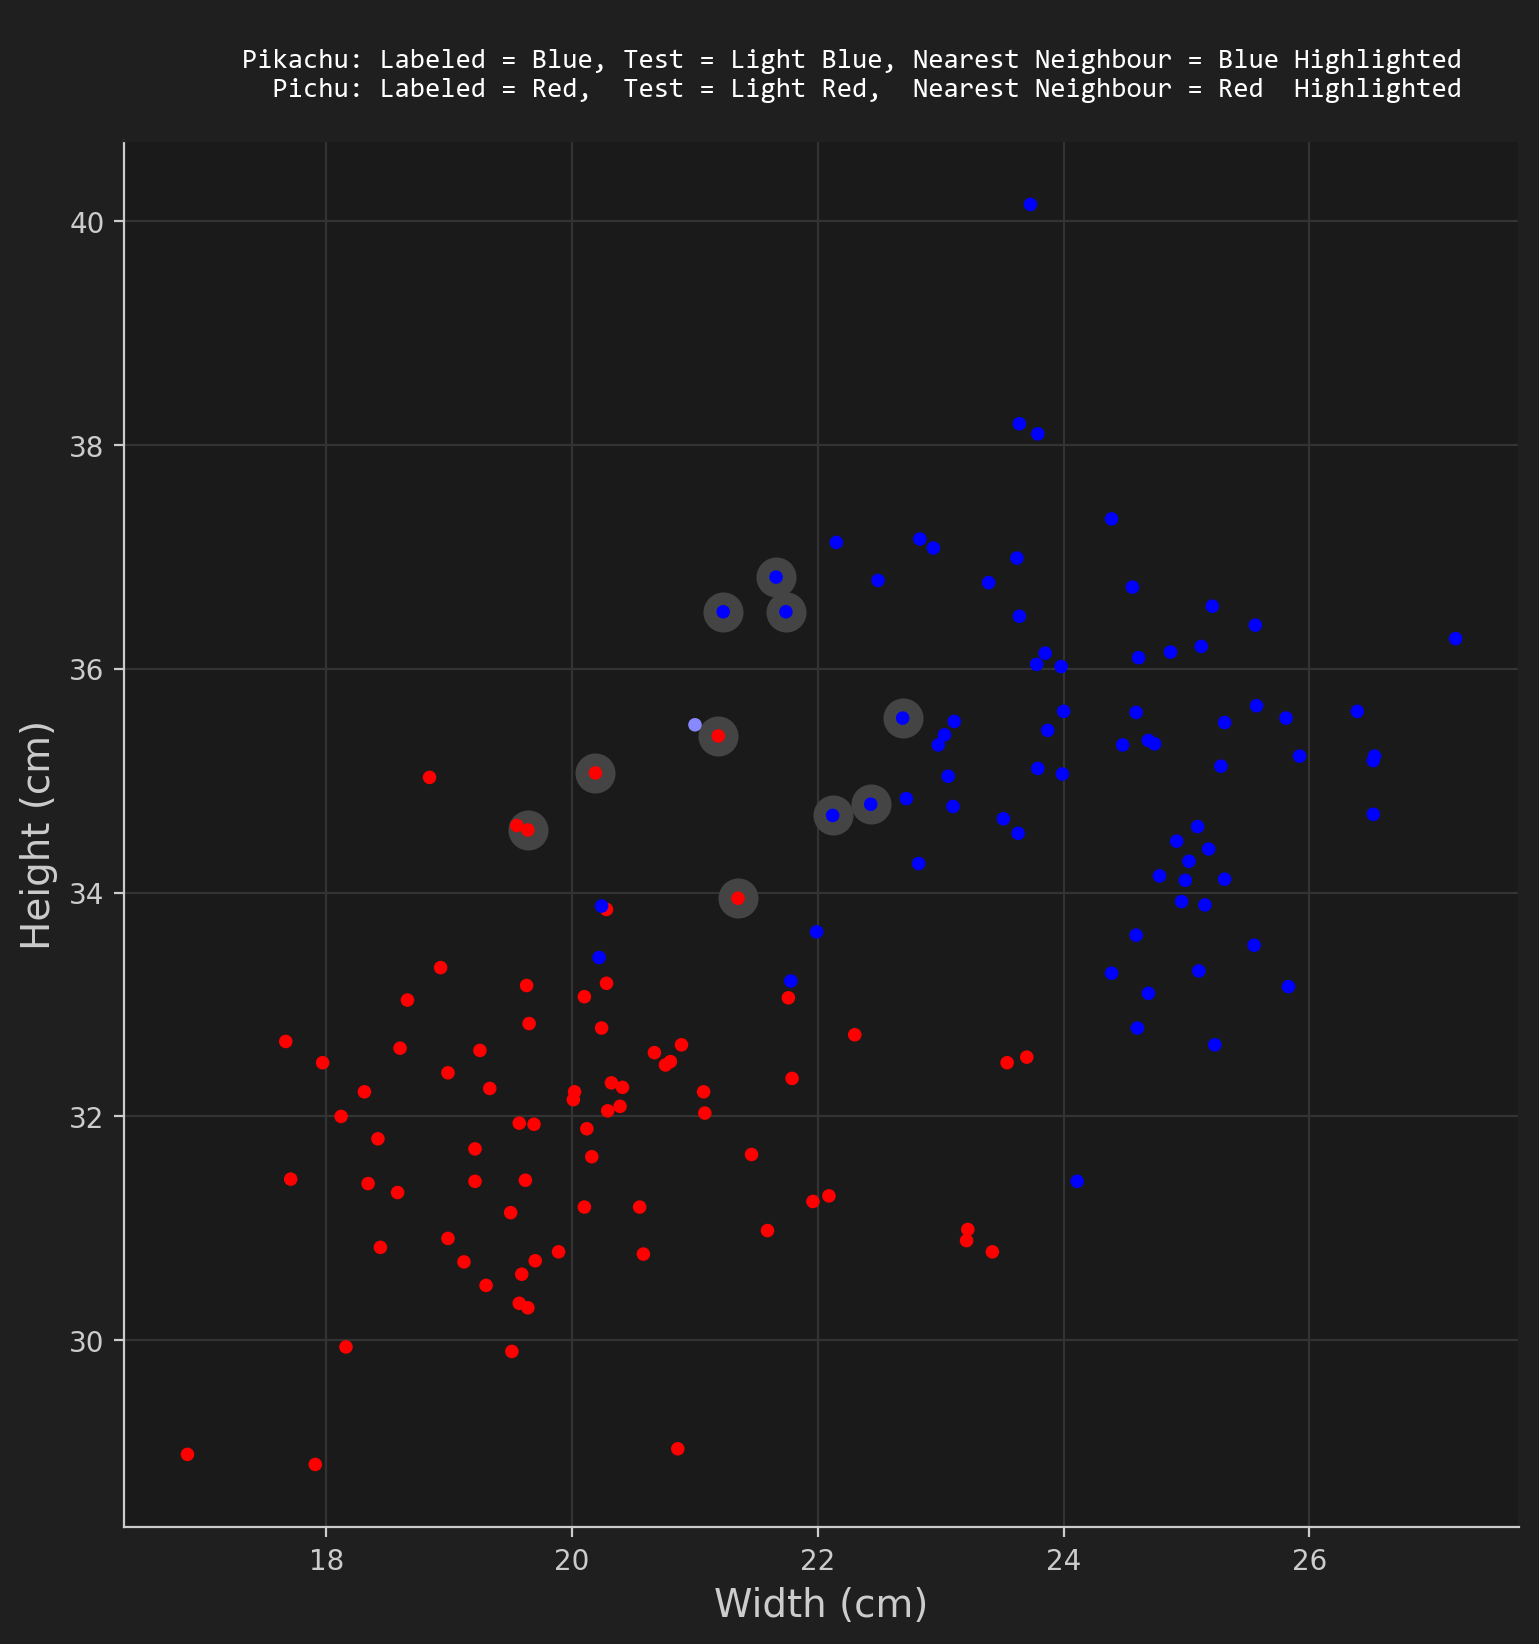

In [286]:
# Uppgift 1 - 2 : Användar Input, Närmsta Grupp
# 21 35.5

# Error Handling
def user_input(message:str)->float:
    while True:
        user_input = input(message) 
        # Allow user to input a positive whole or decimal number using either , or . 
        if user_input.replace(".","").replace(",","").isnumeric():
            return float(user_input.replace(",","."))
        elif user_input == "":
             input("Your didn't enter anything, please eneter a postive whole or decimal number. Press Enter to try again")    
        elif user_input[0] == "-" and user_input[1:].replace(".","").replace(",","").isnumeric():
            input("Your input can't be a negative number, please eneter a postive whole or decimal number. Press Enter to try again")
        elif not user_input.isnumeric():
            input("Your input is not numeric, please eneter a postive whole or decimal number. Press Enter to try again") 
    

# Allows the user to add a new test point
def user_test_point():
    return [{ 
        "width":user_input("Input Width: "), 
        "height":user_input("Input Height: "), 
        "label":None, "guess":None, 
        "color":"#ffffff" }]



def main():
    labeld_points = read_data("datapoints.txt", r"(\d.*?), (\d.*?), (\d)")
    new_point = user_test_point()
    
    # Closest Neighbour
    print("Closest Neighbour")
    new_point, closest_points = closest_neighbour(1, new_point , labeld_points)
    new_point = set_color(new_point)
    print(get_classification(new_point))
    plot(labeld_points+new_point, closest_points)

    # Closest Group
    print("Closest Group")
    new_point, closest_points = closest_neighbour(10, new_point , labeld_points)
    new_point = set_color(new_point)
    print(get_classification(new_point))
    plot(labeld_points+new_point, closest_points)
 

main()




                Pikachu       Pichu
                Actual        Actual
    ---------------------------------------
    Picachu       235             15
    Predicted
    ---------------------------------------
    Pichu          16            234
    Predicted
          
    Accuracy: 93.8%


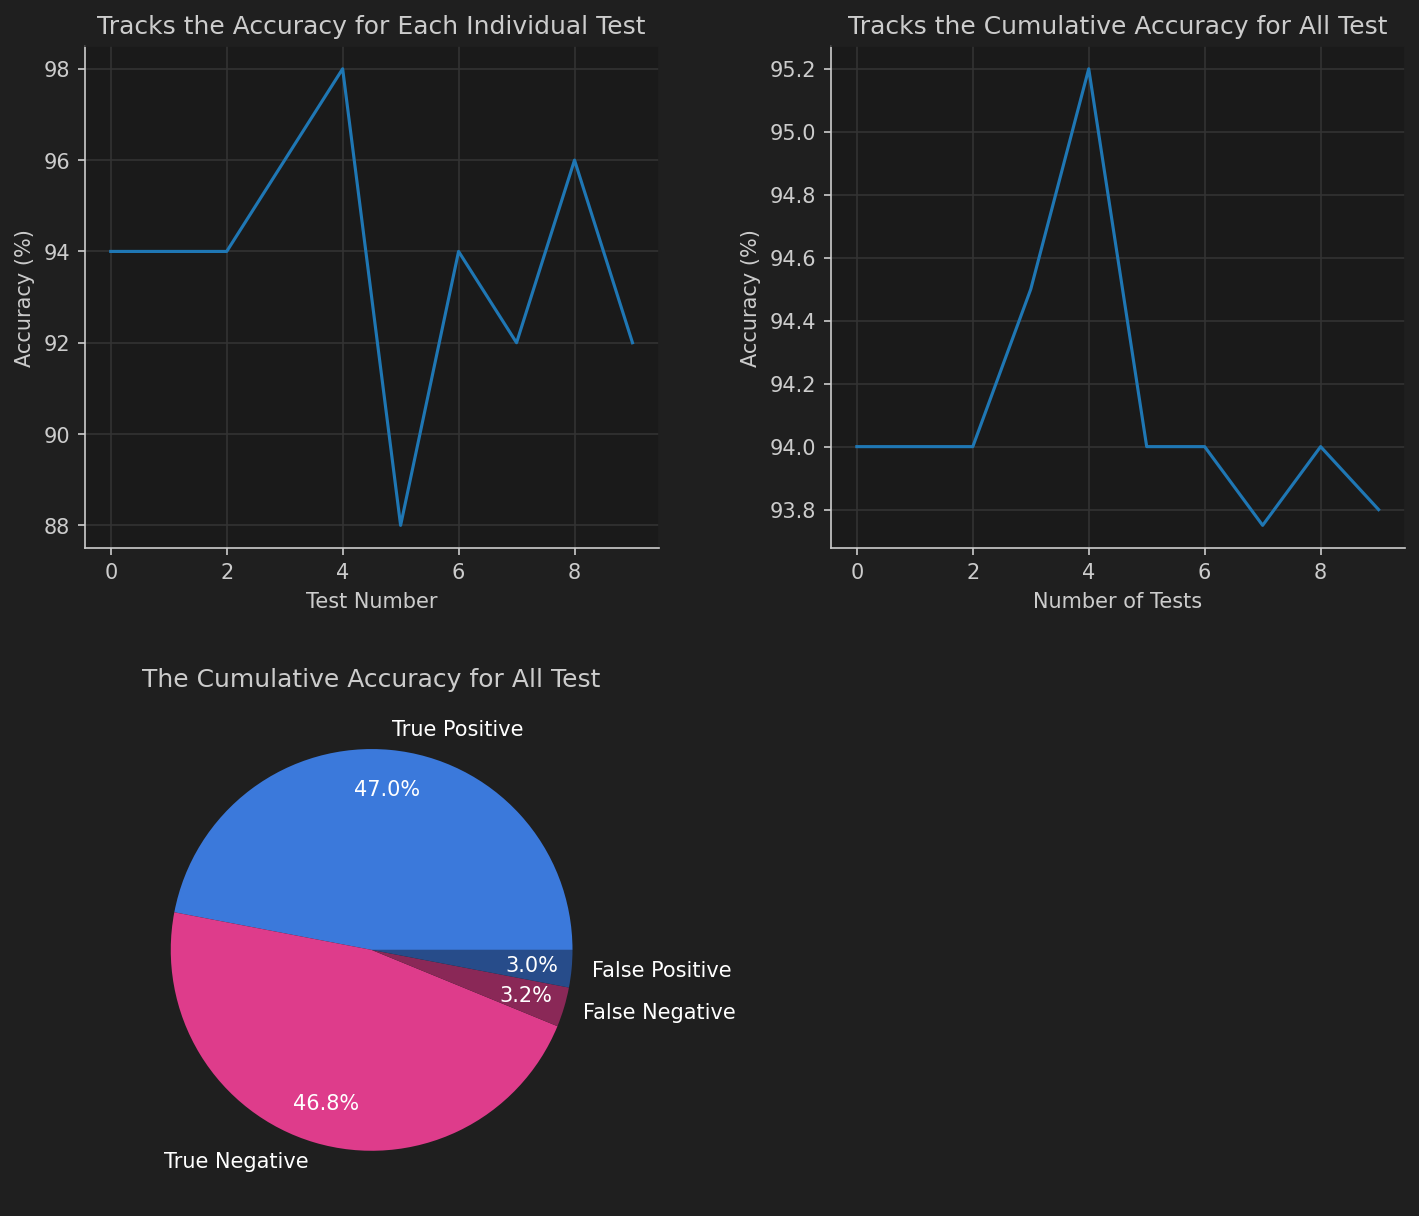

In [293]:
# Uppgift 3 - 4 : Dela in och Slumpa Datapunkterna, Beräkna Norggranheten 
from random import shuffle 

# 1) Shuffle then data extracted from datapoints.txt.
# 2) Sort the data based on label so that I can use slize to
# devide the pikachus and pichus evenly. 
#
# Shuffeling the data before sorting it still keeps the points
# shuffled within there own groups even if the groups them selves
# now are sorted. 
# 
# 3) Shuffle the training data so that the pikachu and pichu 
# group get mixed back togther. This step is probably unnecessary
# but I'm not 100% sure how the sorted() function inside my
# closest_neighbour works, so in case there is a 50/50 tie 
# I don't want it to prioritize pichus because they are the 
# first to be stored in the list that is sorted. 
#  
def shuffle_data(points):
    shuffle(points)
    sorted_creature = sorted(points, key=lambda obj: obj["label"])
    
    training_data = sorted_creature[:50]+sorted_creature[75:125]
    test_data = sorted_creature[50:75]+sorted_creature[125:150]
    
    shuffle(training_data)
    return training_data, test_data

def evaluation(test_data):
    accuracy_data = dict( tp=0, tn=0, fn=0, fp=0 )
    for obj in test_data:
        if obj["label"] == 1 and obj["guess"] == 1:
            accuracy_data["tp"] += 1 
        elif obj["label"] == 0 and obj["guess"] == 0:
            accuracy_data["tn"] += 1
        elif obj["label"] == 1 and obj["guess"] == 0:
            accuracy_data["fp"] += 1
        elif obj["label"] == 0 and obj["guess"] == 1:
            accuracy_data["fn"] += 1     

    return accuracy_data

# Calculates The Accuracy
def accuracy_test(accuracy_data):
    div = 100/sum( [obj for obj in accuracy_data.values()] )
    return div*accuracy_data["tp"]+div*accuracy_data["tn"]

def plot_pie_and_graph(accuracy_data, graph_accuracy, graph_accuracy_cumulative ):
    
    fig, ax = plt.subplots(2,2, dpi=150, figsize=(10, 10)) 
    fig.subplots_adjust(wspace=0.3, hspace=0.3, left=0.02)

    # Pie Graph
    ax[1, 0].pie(
        [val for val in accuracy_data.values()],
        labels=["True Positive", "True Negative", "False Negative", "False Positive"],
        colors=["#3b79db", "#de3c8b", "#8a2857",  "#274c8a" ],
        autopct='%1.1f%%',
        pctdistance=.8, 
        labeldistance=1.10,
        textprops={'color':"w"}
    )
    ax[1,0].set_title("The Cumulative Accuracy for All Test", color=(0.8, 0.8, 0.8))

    # Indvidual Accuracy Graph
    ax[0,0].plot(range(len(graph_accuracy)), graph_accuracy) 
    ax[0,0].tick_params(axis='x', colors=(0.8, 0.8, 0.8))
    ax[0,0].set_facecolor((0.1, 0.1, 0.1))
    ax[0,0].tick_params(axis='y', colors=(0.8, 0.8, 0.8))
    ax[0,0].yaxis.label.set_color((0.8, 0.8, 0.8))
    ax[0,0].xaxis.label.set_color((0.8, 0.8, 0.8))
    ax[0,0].spines['bottom'].set_color((0.8, 0.8, 0.8))
    ax[0,0].spines['left'].set_color((0.8, 0.8, 0.8))
    ax[0,0].spines['top'].set_color((0.12, 0.12, 0.12))
    ax[0,0].spines['right'].set_color((0.12, 0.12, 0.12))
    ax[0,0].set_ylabel("Accuracy (%)", fontsize=10, color=(0.8, 0.8, 0.8))
    ax[0,0].set_xlabel("Test Number", fontsize=10, color=(0.8, 0.8, 0.8))
    ax[0,0].set_title("Tracks the Accuracy for Each Individual Test", color=(0.8, 0.8, 0.8))
    ax[0,0].grid(visible=None, which='major', axis='both', color=(0.2, 0.2, 0.2))
   
 
   
    # Cummulative Accuracy Graph
    fig.set_facecolor((0.12, 0.12, 0.12))
    ax[0,1].plot(range(len(graph_accuracy_cumulative)), graph_accuracy_cumulative) 
    ax[0,1].tick_params(axis='x', colors=(0.8, 0.8, 0.8))
    ax[0,1].set_facecolor((0.1, 0.1, 0.1))
    ax[0,1].tick_params(axis='y', colors=(0.8, 0.8, 0.8))
    ax[0,1].yaxis.label.set_color((0.8, 0.8, 0.8))
    ax[0,1].xaxis.label.set_color((0.8, 0.8, 0.8))
    ax[0,1].spines['bottom'].set_color((0.8, 0.8, 0.8))
    ax[0,1].spines['left'].set_color((0.8, 0.8, 0.8))
    ax[0,1].spines['top'].set_color((0.12, 0.12, 0.12))
    ax[0,1].spines['right'].set_color((0.12, 0.12, 0.12))
    ax[0,1].set_ylabel("Accuracy (%)", fontsize=10, color=(0.8, 0.8, 0.8))
    ax[0,1].set_xlabel("Number of Tests", fontsize=10, color=(0.8, 0.8, 0.8))
    ax[0,1].set_title("Tracks the Cumulative Accuracy for All Test", color=(0.8, 0.8, 0.8))
    ax[0,1].grid(visible=None, which='major', axis='both', color=(0.2, 0.2, 0.2))
    
    # Removes the fourt graph that is not used
    fig.delaxes(ax[1,1])

    plt.show()
    plt.close()


def main():
    labeled_points = read_data("datapoints.txt", r"(\d.*?), (\d.*?), (\d)")
    
    graph_accuracy = list()
    graph_accuracy_cumulative = list()
    accuracy_data_total = dict( tp=0, tn=0, fn=0, fp=0 )
   
    for _ in range(10):
        # Sorts and Shuffles the data
        training_data, test_data = shuffle_data(labeled_points)
        # Determines the label based on the 10 closest neighbours
        test_data, closest_points = closest_neighbour(10, test_data, training_data)
        # Sorts the test data in to True Positive, True Negative, False Positive and False Negative
        accuracy_data = evaluation(test_data)
        # Adds the data to the differnt lists
        graph_accuracy.append(accuracy_test(accuracy_data))
        graph_accuracy_cumulative.append(sum(graph_accuracy)/len(graph_accuracy))
        for key in accuracy_data.keys():
            accuracy_data_total[key] += accuracy_data[key]
        

    accuracy_total = accuracy_test(accuracy_data_total)

    print(f"""
                Pikachu       Pichu
                Actual        Actual
    ---------------------------------------
    Picachu       {accuracy_data_total["tp"]}             {accuracy_data_total["fp"]}
    Predicted
    ---------------------------------------
    Pichu          {accuracy_data_total["fn"]}            {accuracy_data_total["tn"]}
    Predicted
          """)
    print(f"    Accuracy: {accuracy_total:.1f}%")


    plot_pie_and_graph(accuracy_data_total, graph_accuracy, graph_accuracy_cumulative)


main()